Error: Unable to parse 'timing_results.csv'. Ensure the file is properly formatted.


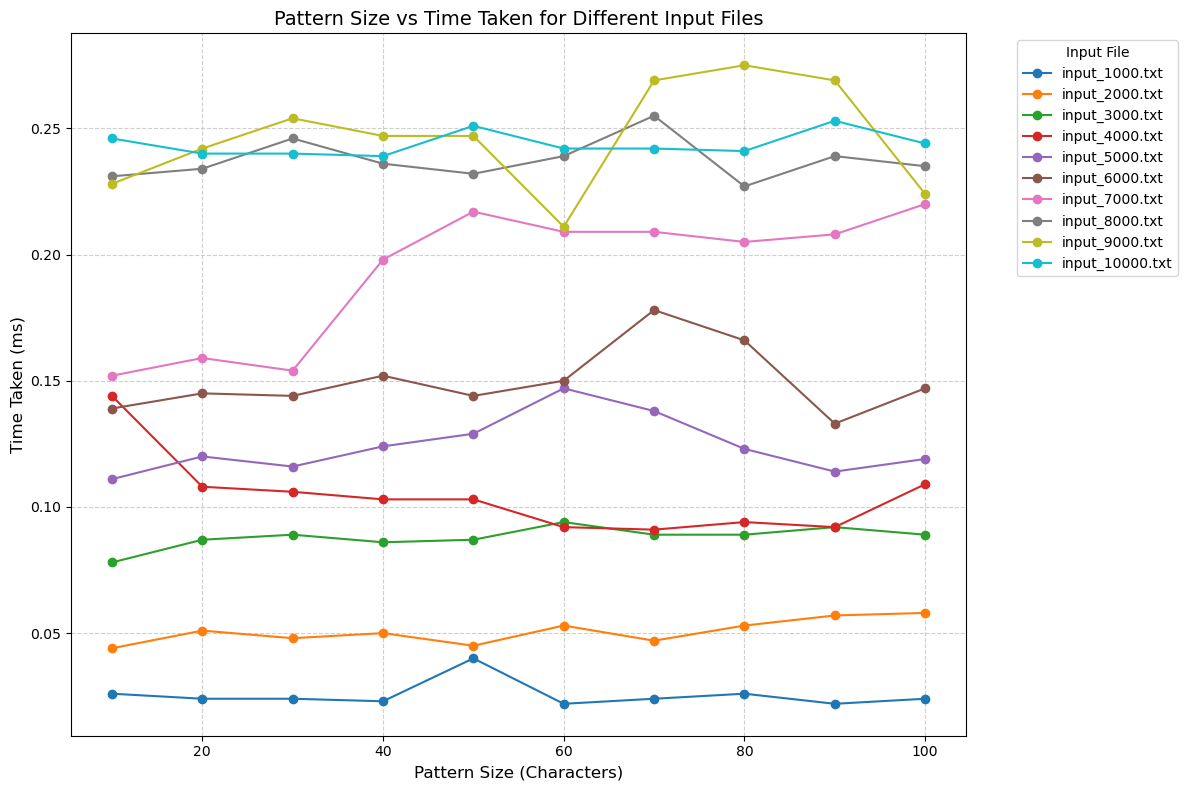

<Figure size 640x480 with 0 Axes>

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the CSV file
try:
    data = pd.read_csv("timing_results.csv", quotechar='"', escapechar='\\')
except FileNotFoundError:
    print("Error: 'timing_results.csv' not found. Please run the C++ program first.")
    exit(1)
except pd.errors.ParserError:
    print("Error: Unable to parse 'timing_results.csv'. Ensure the file is properly formatted.")
    exit(1)

# Plot the data
plt.figure(figsize=(12, 8))  # Set figure size for better readability

# Plot a line for each input file
for file in data["InputFile"].unique():
    subset = data[data["InputFile"] == file]  # Filter data for the current file
    plt.plot(subset["PatternSize"], subset["TimeTaken(ms)"], label=file, marker='o')

# Add labels and title
plt.xlabel("Pattern Size (Characters)", fontsize=12)
plt.ylabel("Time Taken (ms)", fontsize=12)
plt.title("Pattern Size vs Time Taken for Different Input Files", fontsize=14)

# Add a legend
plt.legend(title="Input File", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Save the plot as an image (optional)
plt.savefig("pattern_vs_time_plot.png", dpi=300, bbox_inches="tight")